# Early Stopping

# Steps:

### Step 1. Import dependencies:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2. Load your dataset:
Replace the following path with the path of data set in your Google Drive.

In [2]:
# Define the path to your data
path = "/content/moblie-1.csv"

In [3]:
data = pd.read_csv(path)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Step 3. Split the data into features (X) and target variable (y):

In [4]:
# define the features (X) by dropping the 'price_range' column from the table
X = data.drop('price_range', axis=1)
# define the output (y) as 'price_range' column in the table
y = data['price_range']

### Step 4. Split the data into training and testing sets:

In [5]:
# Choose the train test ratio of 80% to 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5. Standardize the features:

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 6. Create a simple neural network model:



In [7]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# for the next layer, use 32 neurons and 'relu' activation function
model.add(Dense(32, activation='relu'))
# use 'sigmoid' activation function for the final layer below
model.add(Dense(1, activation='sigmoid'))

### Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model
# choose number of epochs to be 100, and batch_size of 32
fitted_model = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.6665 - accuracy: 0.5867 - val_loss: 0.5887 - val_accuracy: 0.7375
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7844 - val_loss: 0.4773 - val_accuracy: 0.8250
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8609 - val_loss: 0.3661 - val_accuracy: 0.8625
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.9062 - val_loss: 0.2771 - val_accuracy: 0.8875
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9398 - val_loss: 0.2207 - val_accuracy: 0.9094
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9523 - val_loss: 0.1846 - val_accuracy: 0.9281
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9625 - val_loss: 0.1597 - val_accuracy: 0.9375
Epoch 8/100
4

### Step 7. Plot training and validation loss over epochs:


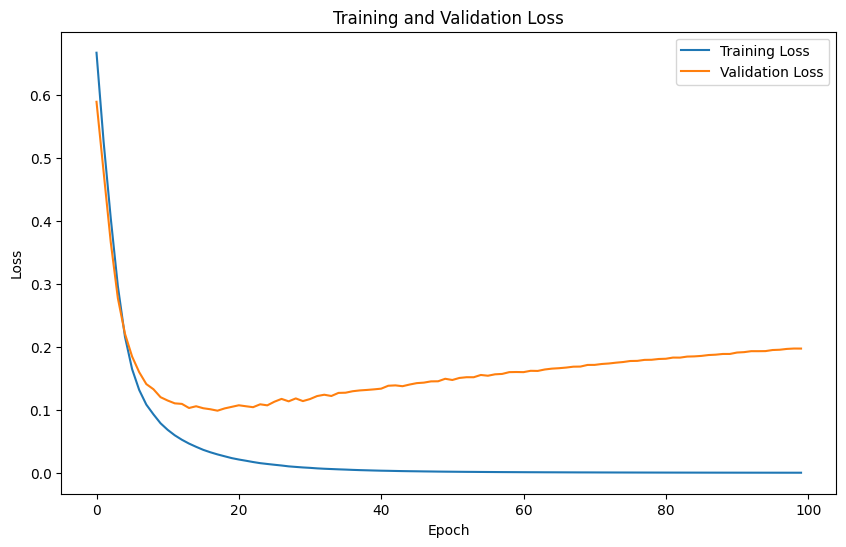

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.history['loss'], label='Training Loss')
plt.plot(fitted_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Step 8. Evaluate the model on the train set:

In [9]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
print("Train Accuracy:", train_accuracy)

50/50 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9900
Train Accuracy: 0.9900000095367432


### Step 9. Evaluate the model on the test set:

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test loss:", test_loss )

13/13 [==============================] - 0s 2ms/step - loss: 18937.5566 - accuracy: 0.5100
Test Accuracy: 0.5099999904632568
Test loss: 18937.556640625
